<a href="https://colab.research.google.com/github/tasosnikitakis/Machine-and-Deep-Learning/blob/main/ANN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

## Part 1 - Data Preprocessing

### Importing the dataset

In [9]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=b0c31581192e90c071eb4d8e097b2ffe91814b190ef62c78a3e7f1f6c6bea392
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [37]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 40.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [ ]:
tf.__version__

'2.12.0'

In [12]:
dataset = pd.read_csv('Churn_Modelling.csv')
x = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [13]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [14]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 2] = le.fit_transform(x[:, 2])

In [16]:
print(x)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [18]:
print(x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [20]:
print(x_train)

[[0.0 1.0 0.0 ... 0 1 124749.08]
 [1.0 0.0 0.0 ... 0 0 41104.82]
 [0.0 1.0 0.0 ... 1 1 45750.21]
 ...
 [1.0 0.0 0.0 ... 1 1 92027.69]
 [1.0 0.0 0.0 ... 1 1 101168.9]
 [0.0 1.0 0.0 ... 1 0 33462.94]]


In [21]:
print(x_test)

[[1.0 0.0 0.0 ... 1 1 97057.28]
 [1.0 0.0 0.0 ... 1 0 66526.01]
 [1.0 0.0 0.0 ... 0 1 90537.47]
 ...
 [0.0 0.0 1.0 ... 0 1 161571.79]
 [0.0 1.0 0.0 ... 1 1 165257.31]
 [0.0 1.0 0.0 ... 1 1 49025.79]]


In [22]:
print(y_train)

[0 0 1 ... 1 0 1]


In [23]:
print(y_test)

[0 0 0 ... 0 0 0]


### Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
print(x_train)

[[-0.99850112  1.71490137 -0.57273139 ... -1.55337352  0.97725852
   0.42739449]
 [ 1.00150113 -0.58312392 -0.57273139 ... -1.55337352 -1.02327069
  -1.02548708]
 [-0.99850112  1.71490137 -0.57273139 ...  0.64376017  0.97725852
  -0.94479772]
 ...
 [ 1.00150113 -0.58312392 -0.57273139 ...  0.64376017  0.97725852
  -0.14096853]
 [ 1.00150113 -0.58312392 -0.57273139 ...  0.64376017  0.97725852
   0.01781218]
 [-0.99850112  1.71490137 -0.57273139 ...  0.64376017 -1.02327069
  -1.15822478]]


In [26]:
print(x_test)

[[ 1.00150113 -0.58312392 -0.57273139 ...  0.64376017  0.97725852
  -0.05360571]
 [ 1.00150113 -0.58312392 -0.57273139 ...  0.64376017 -1.02327069
  -0.58392685]
 [ 1.00150113 -0.58312392 -0.57273139 ... -1.55337352  0.97725852
  -0.16685331]
 ...
 [-0.99850112 -0.58312392  1.74601919 ... -1.55337352  0.97725852
   1.0669965 ]
 [-0.99850112  1.71490137 -0.57273139 ...  0.64376017  0.97725852
   1.13101314]
 [-0.99850112  1.71490137 -0.57273139 ...  0.64376017  0.97725852
  -0.88790165]]


## Part 2 - Building the ANN

### Initializing the ANN

In [27]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [28]:
ann.add(tf.keras.layers.Dense(units=6, activation = "relu"))

### Adding the second hidden layer

In [29]:
ann.add(tf.keras.layers.Dense(units=6, activation = "relu"))

### Adding the output layer

In [30]:
ann.add(tf.keras.layers.Dense(units=1, activation = "sigmoid"))

## Part 3 - Training the ANN

### Compiling the ANN

In [31]:
ann.compile(optimizer= "adam", loss= "binary_crossentropy", metrics=["accuracy"])

### Training the ANN on the Training set

In [32]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/1000
250/250 [==============================] - 2s 3ms/step - loss: 0.5645 - accuracy: 0.7598
Epoch 2/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.7972
Epoch 3/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.7986
Epoch 4/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.8175
Epoch 5/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8275
Epoch 6/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8356
Epoch 7/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8405
Epoch 8/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8422
Epoch 9/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.8474
Epoch 10/1000
250/250 [==============================] - 0s 2ms/step - loss: 0.363

In [44]:
from ann_visualizer.visualize import ann_viz
ann_viz(ann, title="My first neural network", view=True, filename="network.gv")

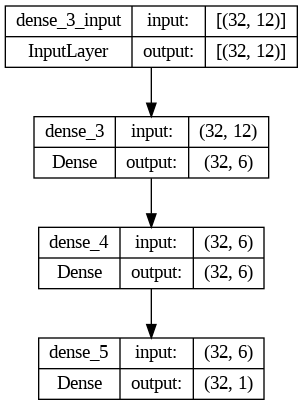

In [35]:
from keras.utils.vis_utils import plot_model
plot_model(ann, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

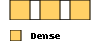

In [40]:
import visualkeras
visualkeras.layered_view(ann, legend=True, draw_volume=False)

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Solution**

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 192ms/step
[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [ ]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


### Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1529   56]
 [ 197  218]]


0.8735